In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_merged = pd.read_csv('Customer_merged.csv')
df_merged

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [11]:
df_anios = df_merged.groupby(['Year','Month'])['Flights_Booked'].sum().reset_index()
df_anios

,Year,Month,Flights_Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [19]:
df_2017 = df_anios[df_anios['Year'] == 2017]
df_2017


,Year,Month,Flights_Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [24]:
df_2018 = df_anios[df_anios['Year'] == 2018]
df_2018

,Year,Month,Flights_Booked
12,2018,1,49170
13,2018,2,48643
14,2018,3,66928
15,2018,4,56791
16,2018,5,76891
17,2018,6,92749
18,2018,7,104143
19,2018,8,90512
20,2018,9,73075
21,2018,10,69110


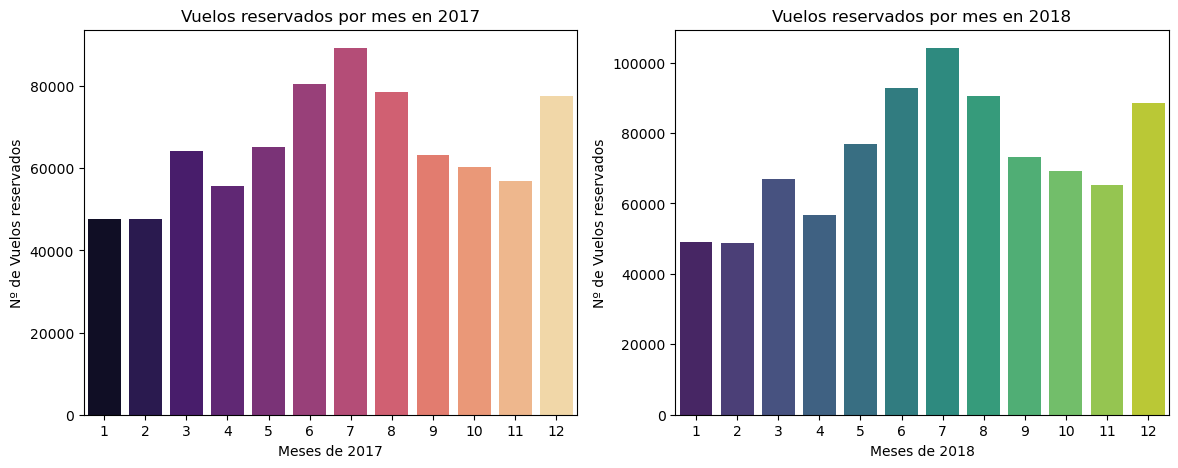

In [30]:
#vamos a crear subplots, para que se vean los dos años, una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#para el año 2017
sns.barplot(x = "Month",
              y= "Flights_Booked", 
              data = df_2017, 
              palette = "magma",
              ax=axes[0]) #para que la gráfica salga en primera posición
axes[0].set_xlabel("Meses de 2017")
axes[0].set_ylabel("Nº de Vuelos reservados")
axes[0].set_title("Vuelos reservados por mes en 2017"); 

#para el año 2018
sns.barplot(x = "Month",
              y= "Flights_Booked", 
              data = df_2018, 
              palette = "viridis",
              ax=axes[1])
axes[1].set_xlabel("Meses de 2018")
axes[1].set_ylabel("Nº de Vuelos reservados")
axes[1].set_title("Vuelos reservados por mes en 2018"); 

In [ ]:
#comentar que los puntos máximos de reservas de vuelos de ambos años coinciden con los meses de vacaciones en verano
#y navidad, la pasqua es cambiante, según el año, y ahí se puede ver alterado según el mes que cae. Los meses con menos 
#reservas de vuelos son Enero y Febrero y Julio es el máximos. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Text(0.5, 1.0, 'Relación entre distancia y puntos acumulados')

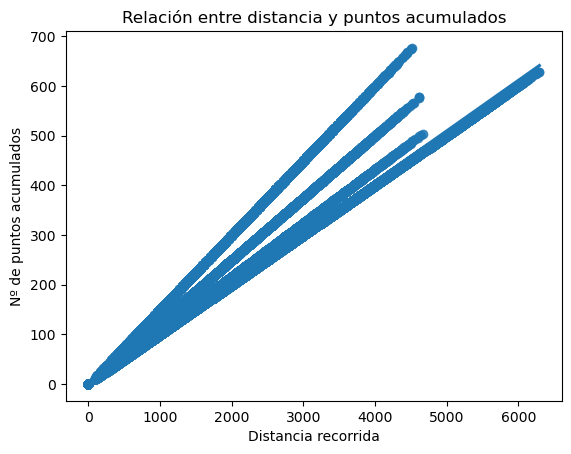

In [4]:
sns.regplot(x = "Distance",
              y= "Points_Accumulated", 
              data = df_merged)
plt.xlabel("Distancia recorrida")
plt.ylabel("Nº de puntos acumulados")
plt.title("Relación entre distancia y puntos acumulados")

In [ ]:
#Hay una clara relación, prácticamente lineal, entre las distancias recorridas y los puntos acumulados. 
#Hay una ligera dispersión según la línea, pero, a lo mejor la compañía tiene otros factores y no solo la distancia
#con la que miden los puntos acumulados, puede ser también la reserva de la clase en el vuelo, dinero gastado en cada vuelo, etc.

3.  ¿Cuál es la distribución de los clientes por provincia o estado?

In [9]:
#Aclaración, todos los clientes son de Canada. 
df_province = df_merged.groupby("Province")['Loyalty_Number'].count().reset_index()
df_province

,Province,Loyalty_Number
0,Alberta,23400
1,British Columbia,106848
2,Manitoba,15984
3,New Brunswick,15432
4,Newfoundland,6312
5,Nova Scotia,12576
6,Ontario,130896
7,Prince Edward Island,1584
8,Quebec,79968
9,Saskatchewan,9936


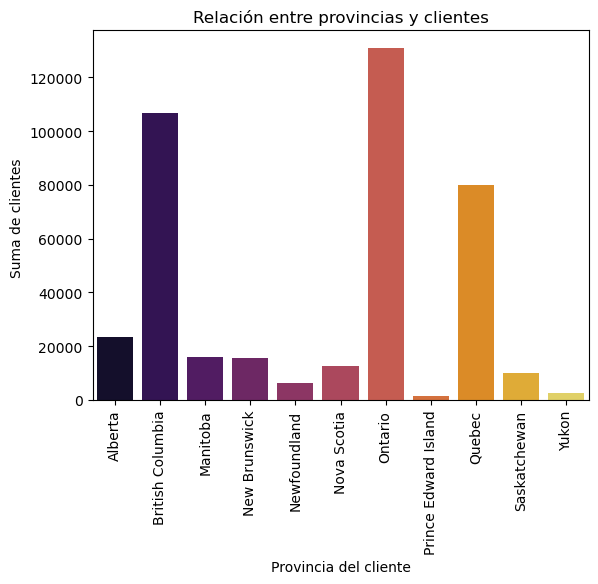

In [12]:
sns.barplot(x = "Province",
              y= "Loyalty_Number", 
              data = df_province, 
              palette = "inferno")
plt.xlabel("Provincia del cliente")
plt.xticks(rotation = 90)
plt.ylabel("Suma de clientes ")
plt.title("Relación entre provincias y clientes"); 

In [ ]:
#Ontario, British Columbia y Quebec son las  Provincias  de Canadá, con más flujo de vuelos y viajeros. Una de ellas
# tiene la capital y las otras dos son centros culturales y puntos comerciales.
#  Podemos ver una gran diferencia entre otras Provincias donde la cantidad de clientes es mucho menor, dado a que no son regiones
# en la que los trabajadores necesiten desplazarse tanto. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [17]:
df_salario = df_merged.groupby('Education')['Salary'].mean().reset_index()
df_salario

,Education,Salary
0,Bachelor,72601.235033
1,College,NaN
2,Doctor,178335.439516
3,High_School_or_Below,61112.377525
4,Master,103767.494163


In [ ]:
df_college = df_merged[df_merged['Education'] == 'College']
df_college #tiene lógica que si el cliente todavía está estudiando en la universidad, todavía no tenga un salario, por eso puede ser Nan

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
17,100737,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Star,12786.67,Standard,2017,4,NaN,NaN
20,100853,2017,1,6,6,12,1236,123.0,0,0,Ontario,Trenton,K8V 4B2,Male,College,NaN,Married,Star,10153.89,Standard,2016,1,NaN,NaN
21,100883,2017,1,11,0,11,3124,312.0,0,0,Manitoba,Winnipeg,R3R 3T4,Female,College,NaN,Single,Star,3561.04,Standard,2013,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405611,999524,2018,12,11,4,15,1500,150.0,0,0,Quebec,Montreal,H2T 2J6,Male,College,NaN,Married,Aurora,14325.15,Standard,2015,5,NaN,NaN
405613,999589,2018,12,14,0,14,4690,469.0,0,0,Nova Scotia,Halifax,B3J 9S2,Male,College,NaN,Married,Nova,5003.34,Standard,2018,6,NaN,NaN
405616,999758,2018,12,1,0,1,896,89.0,0,0,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Star,18690.34,Standard,2018,8,NaN,NaN
405619,999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN


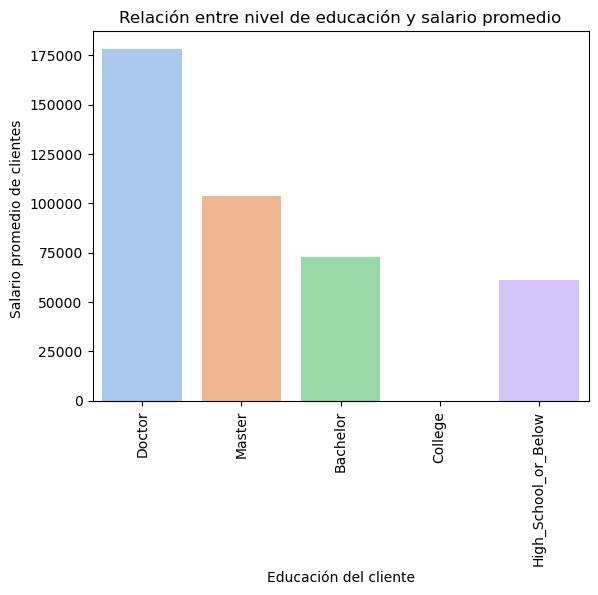

In [23]:
sns.barplot(x = "Education",
              y= "Salary", 
              data = df_salario, 
              palette = "pastel",
              order = ['Doctor', 'Master', 'Bachelor', 'College', 'High_School_or_Below'])
plt.xlabel("Educación del cliente")
plt.xticks(rotation = 90)
plt.ylabel("Salario promedio de clientes ")
plt.title("Relación entre nivel de educación y salario promedio"); 

In [ ]:
#Se puede apreciar que el salario promedio crece a más nivel de educación. Las personas con doctorado son las que tienen
#el salario promedio más alto, seguidas de las de máster. Los que menos ganana, son las personas que solo han acabado
#el insituto o estan por debajo. No tenemos datos de 'College' porque puede ser que sean estudiantes y todavía no cobren mensualmente.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?